# 타이타닉 데이터 이진분류 정확도 경시대회

    - Seaborn titanic data: 전처리는 ML에서 했던대로 할 것
    - random seed = 2022
    - train_test_split : test_size=0.2
    - validation_split = 0.2
신경망을 사용해서 정확도를 도출

모델 정의/설정/실행 --> 임의로 결정


파일이름: 이름0.8934html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'deck']]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [4]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [5]:
df.age.fillna(df.age.mean(), inplace=True)

In [6]:
df.age.isna().sum()

0

In [7]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [8]:
df.embarked.fillna('S', inplace=True)
df.embarked.isna().sum()

0

In [9]:
round(df['age'].mean(), 1)

29.7

In [10]:
df['age'].fillna(round(df['age'].mean(), 1), inplace=True)
df.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.000000,1,0,7.2500,S,NaN
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,S,NaN
3,1,1,female,35.000000,1,0,53.1000,S,C
4,0,3,male,35.000000,0,0,8.0500,S,NaN
5,0,3,male,29.699118,0,0,8.4583,Q,NaN


In [11]:
df.drop(columns=['deck'], inplace=True)
df.isna().sum().sum()

0

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df.sex = le.fit_transform(df.sex)
df.embarked = le.fit_transform(df.embarked)

df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


In [15]:
np.unique(df.values[:,-1], return_counts=True)

(array([0., 1., 2.]), array([168,  77, 646]))

In [16]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, stratify=y, random_state=seed, test_size=0.2
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
model_titanic = Sequential([
    Dense(61, input_dim=7, activation='relu'),
    Dense(30, activation='relu'),
    Dense(15, activation='relu'),
    Dense(7, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_titanic.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 61)                488       
                                                                 
 dense_32 (Dense)            (None, 30)                1860      
                                                                 
 dense_33 (Dense)            (None, 15)                465       
                                                                 
 dense_34 (Dense)            (None, 7)                 112       
                                                                 
 dense_35 (Dense)            (None, 3)                 24        
                                                                 
 dense_36 (Dense)            (None, 1)                 4         
                                                                 
Total params: 2,953
Trainable params: 2,953
Non-traina

In [69]:
model_titanic.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
import os
if not os.path.exists('titanic_model'):
    os.mkdir('titanic_model')

In [71]:
model_titanic_path = 'titanic_model/survive_titanic.h5'

In [72]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    model_titanic_path, monitor='val_loss', verbose=1, save_best_only=True
)

In [73]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=50)

In [74]:
hist_titanic = model_titanic.fit(X_train, y_train, validation_split = 0.2, verbose=1,
                                 epochs=200, batch_size=200,
                                 callbacks=[checkpoint, early_stopping])
model_titanic.evaluate(X_test, y_test)

Epoch 1/200
1/3 [=========>....................] - ETA: 1s - loss: 0.6954 - accuracy: 0.5000
Epoch 00001: val_loss improved from inf to 0.69191, saving model to titanic_model/survive_titanic.h5
3/3 [==============================] - 1s 111ms/step - loss: 0.6941 - accuracy: 0.5571 - val_loss: 0.6919 - val_accuracy: 0.6014
Epoch 2/200
1/3 [=========>....................] - ETA: 0s - loss: 0.6922 - accuracy: 0.6300
Epoch 00002: val_loss improved from 0.69191 to 0.69030, saving model to titanic_model/survive_titanic.h5
3/3 [==============================] - 0s 33ms/step - loss: 0.6919 - accuracy: 0.6221 - val_loss: 0.6903 - val_accuracy: 0.6014
Epoch 3/200
1/3 [=========>....................] - ETA: 0s - loss: 0.6901 - accuracy: 0.6450
Epoch 00003: val_loss improved from 0.69030 to 0.68860, saving model to titanic_model/survive_titanic.h5
3/3 [==============================] - 0s 29ms/step - loss: 0.6899 - accuracy: 0.6274 - val_loss: 0.6886 - val_accuracy: 0.6014
Epoch 4/200
1/3 [========

[0.40300965309143066, 0.8435754179954529]

In [67]:
del model_titanic

In [75]:
model_titanic.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8436


[0.40300965309143066, 0.8435754179954529]

In [76]:
y_acc = hist_titanic.history['accuracy']
y_vloss = hist_titanic.history['val_loss']
xs = np.arange(1,len(y_acc)+1)

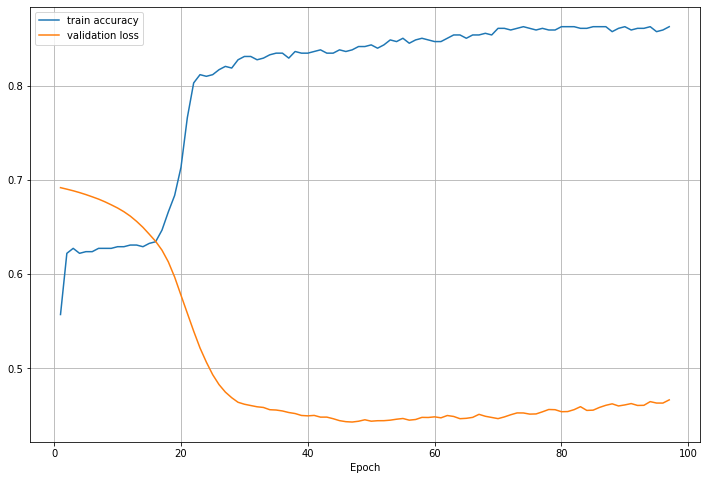

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()